In [10]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from sklearn.cluster import KMeans
import random
import networkx as nx
import math
import itertools    
import matplotlib.pyplot as plt
import ast
import numpy as np
import operator

In [11]:
with open('sensornew.txt', 'r') as f:
    sensor = ast.literal_eval(f.read())

In [35]:
sensor

[(7, 432),
 (8, 471),
 (128, 386),
 (149, 119),
 (157, 329),
 (200, 439),
 (295, 424),
 (311, 359),
 (330, 207),
 (338, 163),
 (346, 22),
 (353, 327),
 (354, 119),
 (387, 442),
 (489, 392)]

In [12]:
s=[list(i) for i in sensor]

In [54]:
X=np.array(s)

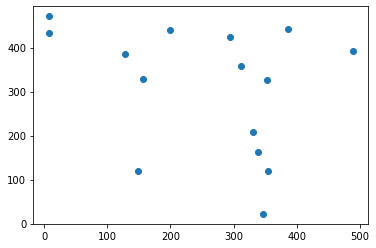

In [14]:
plt.scatter(X[:,0],X[:,1], label='True Position')


In [20]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

KMeans(n_clusters=3)

In [21]:
print(kmeans.cluster_centers_)


[[100.  411.4]
 [303.4 126. ]
 [367.  388.8]]


In [22]:
print(kmeans.labels_)


[0 0 0 1 0 0 2 2 1 1 1 2 1 2 2]


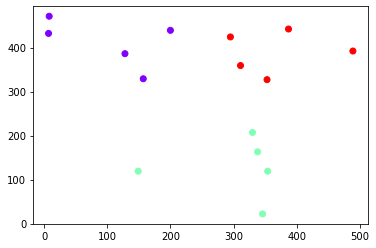

In [23]:
plt.scatter(X[:,0],X[:,1], c=kmeans.labels_, cmap='rainbow')


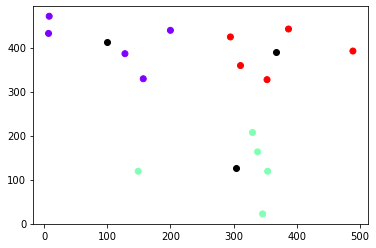

In [24]:
plt.scatter(X[:,0], X[:,1], c=kmeans.labels_, cmap='rainbow')
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black')

In [101]:
from sklearn.cluster import AffinityPropagation

In [102]:
clustering = AffinityPropagation(random_state=5).fit(X)

In [103]:
clustering

AffinityPropagation(random_state=5)

In [104]:
clustering.labels_

array([0, 0, 0, 1, 0, 0, 2, 2, 1, 1, 1, 2, 1, 2, 2], dtype=int64)

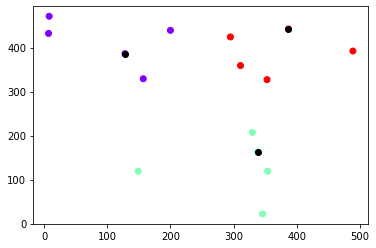

In [105]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow')
plt.scatter(clustering.cluster_centers_[:,0] ,clustering.cluster_centers_[:,1], color='black')

In [30]:
from sklearn.cluster import MeanShift

In [137]:
clustering = MeanShift(bandwidth=190).fit(X)

In [138]:
clustering.labels_

array([1, 1, 1, 3, 1, 1, 0, 0, 2, 2, 2, 0, 2, 0, 0], dtype=int64)

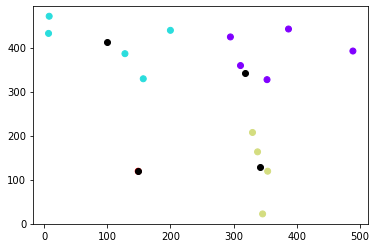

In [139]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow')
plt.scatter(clustering.cluster_centers_[:,0] ,clustering.cluster_centers_[:,1], color='black')

In [140]:
from sklearn.cluster import SpectralClustering

In [145]:
clustering = SpectralClustering(n_clusters=2,
...         assign_labels='discretize',
...         random_state=0).fit(X)

C:\Users\dilip\Anaconda3\lib\site-packages\sklearn\manifold\_spectral_embedding.py:245: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


In [146]:
clustering

SpectralClustering(assign_labels='discretize', n_clusters=2, random_state=0)

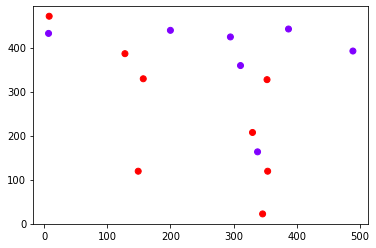

In [147]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow')
#plt.scatter(clustering.cluster_centers_[:,0] ,clustering.cluster_centers_[:,1], color='black')

In [148]:
from sklearn.cluster import DBSCAN

In [155]:
clustering = DBSCAN(eps=90, min_samples=2).fit(X)

In [156]:
clustering.labels_

array([ 0,  0,  1, -1,  1,  1,  2,  2,  3,  3, -1,  2,  3, -1, -1],
      dtype=int64)

In [160]:
clustering.components_

array([[  7, 432],
       [  8, 471],
       [128, 386],
       [157, 329],
       [200, 439],
       [295, 424],
       [311, 359],
       [330, 207],
       [338, 163],
       [353, 327],
       [354, 119]])

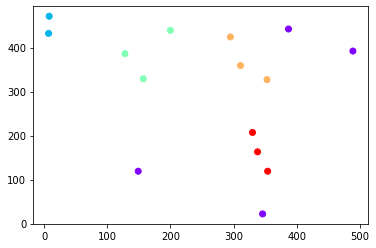

In [157]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow')
#plt.scatter(clustering.cluster_centers_[:,0] ,clustering.cluster_centers_[:,1], color='black')

In [72]:
from sklearn.cluster import OPTICS

In [98]:
clustering = OPTICS(min_samples=2).fit(X)

In [99]:
clustering.labels_

array([ 0,  0,  1, -1,  1,  1,  2,  2,  3,  3,  3,  2,  3,  2, -1])

In [100]:
clustering.core_distances_

array([ 39.01281841,  39.01281841,  63.95310782, 194.05411616,
        63.95310782,  89.40357935,  66.94027188,  52.80151513,
        44.72135955,  44.72135955,  97.32933782,  52.80151513,
        46.81879964,  93.74433316, 113.59577457])

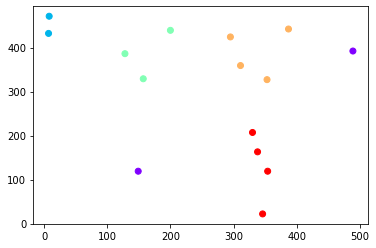

In [75]:
plt.scatter(X[:,0], X[:,1], c=clustering.labels_, cmap='rainbow')
#plt.scatter(clustering.cluster_centers_[:,0] ,clustering.cluster_centers_[:,1], color='black')

In [76]:
from sklearn.cluster import Birch

In [169]:
brc = Birch(branching_factor=50,n_clusters=4,threshold=1.5)

In [170]:
brc.fit(X)


Birch(n_clusters=4, threshold=1.5)

In [171]:
labels=brc.predict(X)

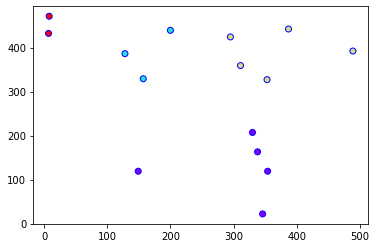

In [179]:
plt.scatter(X[:,0], X[:,1], c=labels, cmap='rainbow',  edgecolors='b')


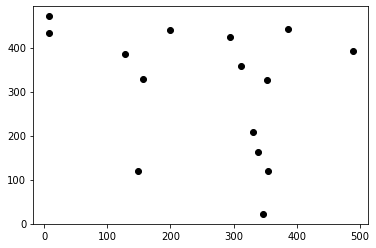

In [178]:
plt.scatter(brc.subcluster_centers_[:,0],brc.subcluster_centers_[:,1],color='black')

In [80]:
from sklearn.mixture import GaussianMixture

In [90]:
gm = GaussianMixture(n_components=4, random_state=0).fit(X)

In [95]:
labels=gm.predict(X)


In [96]:
gm.means_

array([[303.4496985 , 126.37627749],
       [161.2183529 , 384.12867206],
       [364.93759888, 389.16117773],
       [  7.5       , 451.5       ]])

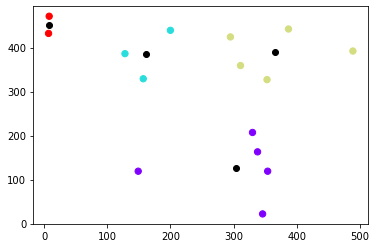

In [97]:
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='rainbow');
plt.scatter(gm.means_[:,0],gm.means_[:,1],color='black')